In [33]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/Data Mining Lab/Project Pokedex')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [34]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv('pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


###Summary of Dataset

In [35]:
# information of data attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [36]:
# checking for null values in the dataset
df.isna().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [37]:
# number of unique values in each attribute
print("*"*15, "Unique Values", "*"*15,"\n")
for column in df.columns:
    print(f"{column[0].upper()}{column[1:]}: {len(df[column].unique())}")

*************** Unique Values *************** 

Abilities: 482
Against_bug: 5
Against_dark: 5
Against_dragon: 4
Against_electric: 6
Against_fairy: 5
Against_fight: 6
Against_fire: 5
Against_flying: 5
Against_ghost: 5
Against_grass: 5
Against_ground: 6
Against_ice: 5
Against_normal: 4
Against_poison: 6
Against_psychic: 6
Against_rock: 5
Against_steel: 5
Against_water: 5
Attack: 114
Base_egg_steps: 10
Base_happiness: 6
Base_total: 203
Capture_rate: 34
Classfication: 588
Defense: 109
Experience_growth: 6
Height_m: 52
Hp: 99
Japanese_name: 801
Name: 801
Percentage_male: 8
Pokedex_number: 801
Sp_attack: 111
Sp_defense: 97
Speed: 113
Type1: 18
Type2: 19
Weight_kg: 422
Generation: 7
Is_legendary: 2


In [38]:
# df.info()
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


###Visualizations

```
Plotting Histogram for count of null values in the attributes
```

In [39]:
fig = px.bar(x=df.columns,y=df.isna().sum())
fig.show()

```
Pie chart for the type1 of pokemon
```

In [40]:
fig = go.Figure(data=[go.Pie(labels=df['type1'].value_counts().index,
                             values=[i for i in df['type1'].value_counts()],
                             textinfo='label+percent')])

fig.update_layout(title_text="Type1 Values' Distribution")
fig.show()

```
Plotting Histogram for attribute: height_m
```

In [41]:
fig = px.histogram(df, x='height_m')
fig.show()

```
Boxplot for attribute: height_m
```

In [42]:
fig = px.box(df, x='height_m')
fig.show()

```
Histogram for attribute: weight_kg
```

In [43]:
fig = px.histogram(df, x='weight_kg')
fig.show()

```
Box for attribute: weight_kg
```

In [44]:
fig = px.box(df, x='weight_kg')
fig.show()

<Axes: xlabel='is_legendary', ylabel='count'>

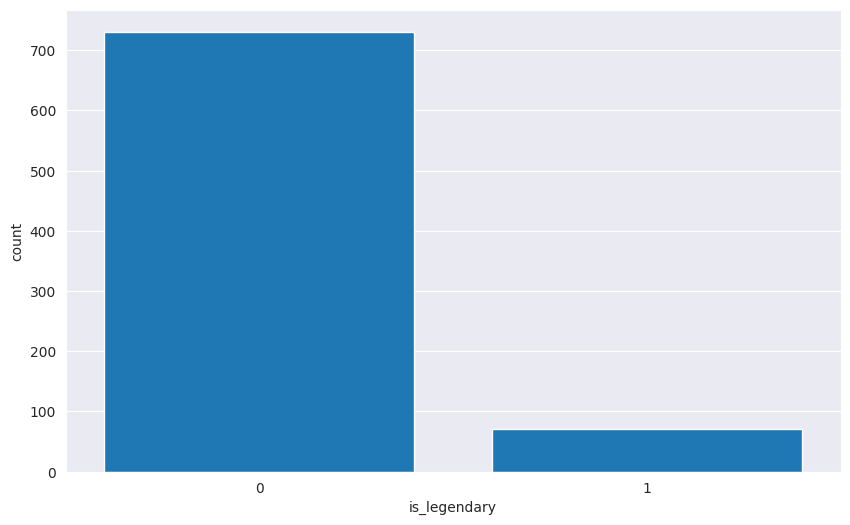

In [45]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.countplot(x='is_legendary', data=df, saturation=1)

<Axes: xlabel='attack', ylabel='defense'>

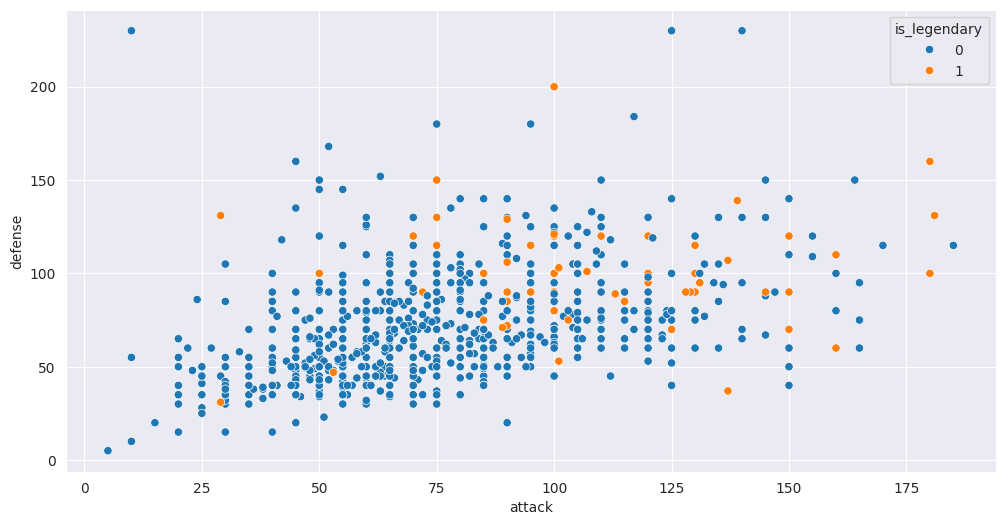

In [46]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='attack', y='defense', hue='is_legendary', data=df)

<Axes: xlabel='count', ylabel='type1'>

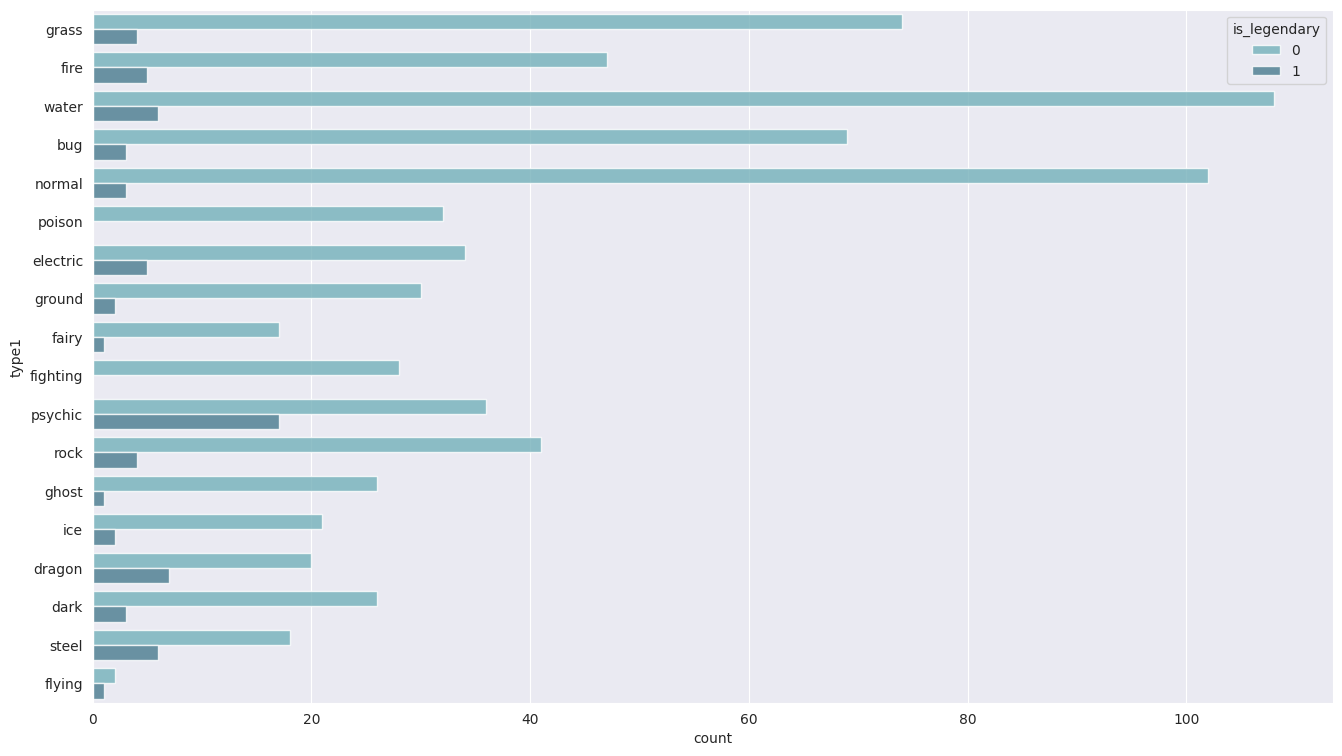

In [47]:
plt.figure(figsize=(16, 9))
sns.countplot(y='type1', hue='is_legendary', data=df, palette='GnBu_d', alpha=0.8)

<Axes: xlabel='against_psychic', ylabel='count'>

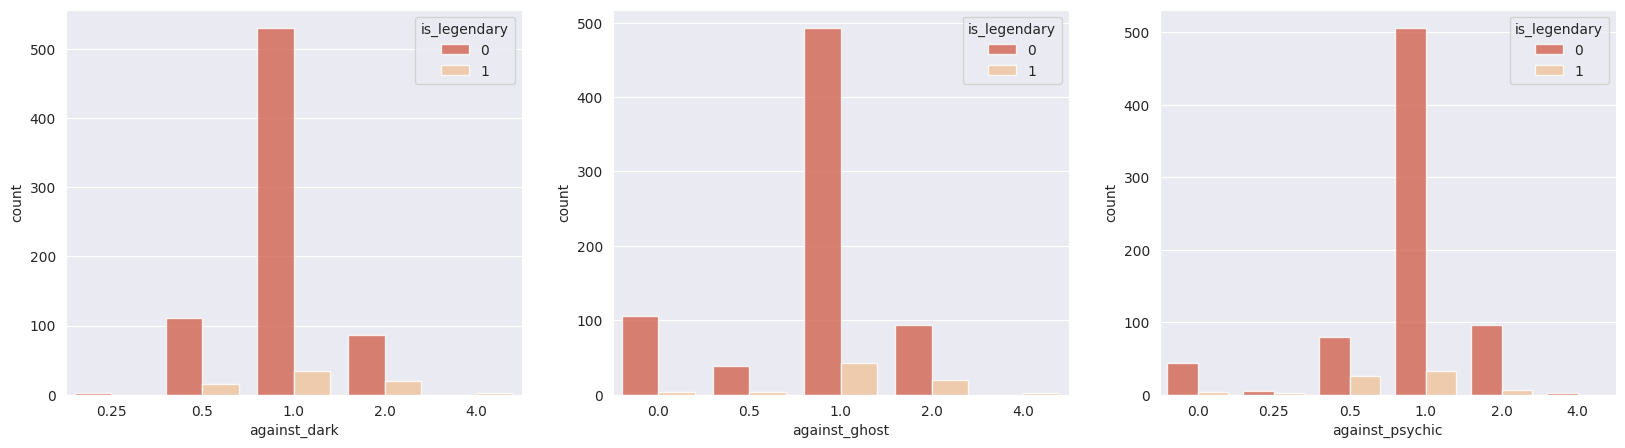

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(x='against_dark', hue='is_legendary', data=df, palette='OrRd_r', ax=axes[0], alpha=0.8)
sns.countplot(x='against_ghost', hue='is_legendary', data=df, palette='OrRd_r', ax=axes[1], alpha=0.8)
sns.countplot(x='against_psychic', hue='is_legendary', data=df, palette='OrRd_r', ax=axes[2], alpha=0.8)

##Preprocessing

<font size=15>```Preprocessing ```

In [49]:
#Setting the names as indexes
df = df.set_index('name')
df.head(3)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
Ivysaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
Venusaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0


In [50]:
#Because of large number is missing values in feature type2, we will be dropping this feature
df = df.drop(['type2', 'percentage_male', 'japanese_name', 'classfication'],axis=1)
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'defense', 'experience_growth', 'height_m', 'hp', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'weight_kg', 'generation',
       'is_legendary'],
      dtype='object')

* Filling Missing Values


In [51]:
df['weight_kg'] = df['weight_kg'].fillna(df['weight_kg'].median())
df['height_m'] = df['height_m'].fillna(df['height_m'].median())

In [52]:
df.isna().sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
defense              0
experience_growth    0
height_m             0
hp                   0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

In [53]:
# # one hot encoding of the abilities

df2 = df.abilities
unique = set()
for i in df2.index:
  x = df2[i]
  # x = x.strip('[').strip(']').replace("'",'').split(',')
  # x = [i.strip(' ') for i in x]
  # df2[i] = tuple(x)
  unique.update(set(df2[i]))

len(unique)

# print(unique)

# df_abilities = pd.get_dummies(df2, prefix='ability')
# df_abilities.head()

56

In [54]:
df = df.drop('abilities',axis=1)

In [55]:
# handling one error value

df['capture_rate'] = df['capture_rate'].replace('30 (Meteorite)255 (Core)', '30')
df['capture_rate'] = df['capture_rate'].astype('int')

## Splitting & Training & Predict

In [56]:
y1 = df.pop('type1')
y2 = df.pop('is_legendary')
X = np.array(df)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xscaled = sc.fit_transform(X)
xscaled

array([[ 6.27488230e-03, -1.30441376e-01,  8.84572052e-02, ...,
        -7.38486281e-01, -4.96352167e-01, -1.39455066e+00],
       [ 6.27488230e-03, -1.30441376e-01,  8.84572052e-02, ...,
        -2.19268500e-01, -4.39892995e-01, -1.39455066e+00],
       [ 6.27488230e-03, -1.30441376e-01,  8.84572052e-02, ...,
         4.73021876e-01,  3.65344378e-01, -1.39455066e+00],
       ...,
       [ 1.68166846e+00, -1.27233802e+00,  2.92262606e+00, ...,
        -8.07715319e-01,  7.65875874e+00,  1.71552381e+00],
       [ 1.68166846e+00,  2.15335190e+00,  8.84572052e-02, ...,
         4.38407357e-01,  1.56857264e+00,  1.71552381e+00],
       [-1.25027030e+00, -1.27233802e+00, -2.74571165e+00, ...,
        -4.61959058e-02,  1.84860139e-01,  1.71552381e+00]])

In [58]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import math

classes = set(y1)
c_matrix = np.array(np.zeros((len(classes), len(classes))))
accuracy = 0

k = 10 # int(input('Enter the value of k:'))

skf = StratifiedKFold(n_splits=k, shuffle=True)

clf = DecisionTreeClassifier()
# n = int(round(math.sqrt(xscaled.shape[0]*9/10),0))
# if n%2 == 0:
#   n -= 1
# clf = KNeighborsClassifier(n_neighbors = n)
# clf = GaussianNB()

for train_index, test_index in skf.split(X,y1):
  x_train, x_test = X[train_index], X[test_index]
  y_train, y_test = y1[train_index], y1[test_index]

  #fitting the model
  clf = clf.fit(x_train, y_train)

  # predicting the y values for x_test
  y_pred = clf.predict(x_test)

  cm = confusion_matrix(y_test, y_pred)
  # c_matrix = np.add(c_matrix, cm)

  acc = accuracy_score(y_test, y_pred)
  accuracy += acc

# print('\nStratified KFold Confusion Matrix:\n', c_matrix)

accuracy = accuracy/k
print('\nStratified KFold Accuracy:', round(accuracy*100,3), '%')


Stratified KFold Accuracy: 89.387 %


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=10.



In [59]:
features = list(df.columns)
classes = clf.classes_
classes
# features

array(['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire',
       'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison',
       'psychic', 'rock', 'steel', 'water'], dtype=object)

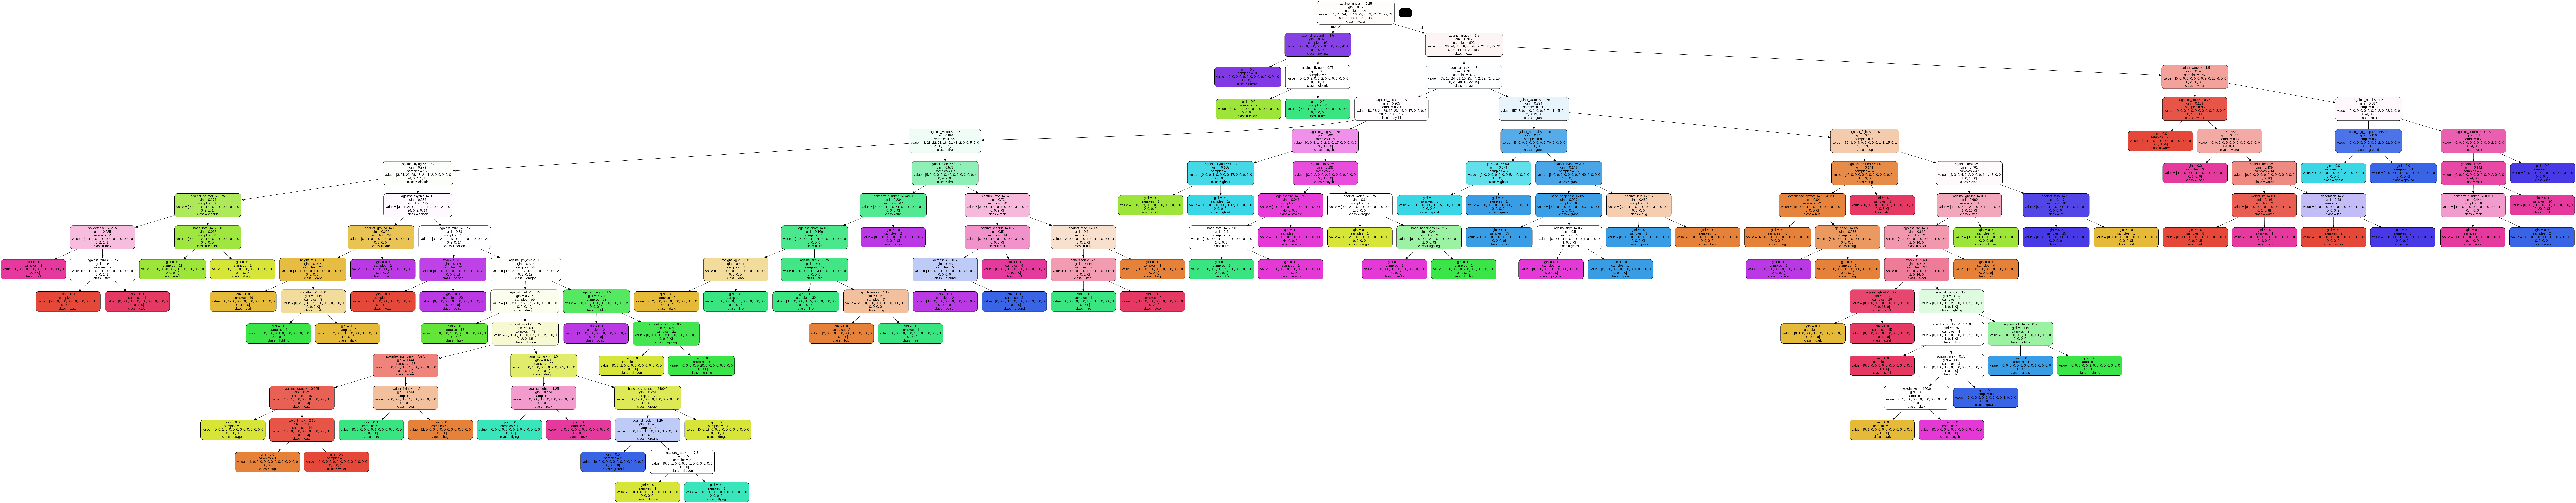

In [60]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(clf, feature_names=features, class_names=classes, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Clustering

In [61]:
# Dimensity reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(xscaled)
print(reduced_data)

[[-2.26120397 -1.31048342]
 [-1.14452925 -1.50810221]
 [ 1.94797744 -1.82535109]
 ...
 [ 8.17536943 -3.40247502]
 [ 5.5620647  -1.28907475]
 [ 4.7869901   1.40546554]]


In [62]:
!pip install kneed

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



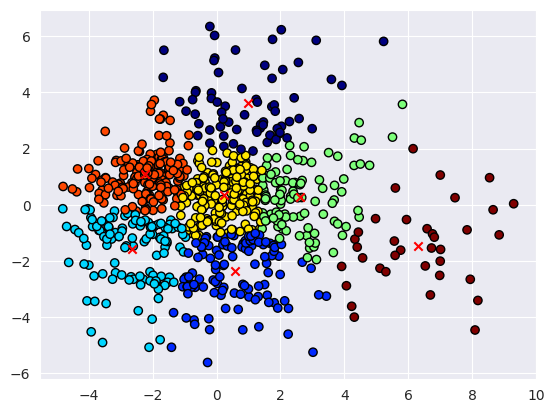

In [63]:
from sklearn.cluster import KMeans
import kneed

sse = list()
for k in range(2,25):
    km = KMeans(n_clusters=k)
    km.fit(reduced_data)
    # km.fit(xscaled)
    sse.append(km.inertia_)

kneedle = kneed.KneeLocator([i for i in range(2,25)], sse, curve='convex', direction='decreasing')
k = kneedle.elbow
print(k)
kmeans = KMeans(n_clusters=k)
kmeans.fit_transform(reduced_data)
# kmeans.fit_transform(xscaled)

centroids = kmeans.cluster_centers_

plt.scatter(reduced_data[:,0], reduced_data[:,1], c=kmeans.labels_, edgecolor='k', cmap='jet')
# plt.scatter(xscaled[:,0], xscaled[:,1], c=kmeans.labels_, edgecolor='k')
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color='red')
plt.show()

fig = px.scatter(x=reduced_data[:,0], y=reduced_data[:,1], color=kmeans.labels_)
#fig = px.scatter(x=xscaled[:,0], y=xscaled[:,1], color=kmeans.labels_)
fig.add_traces(go.Scatter(mode='markers',x=centroids[:,0],y=centroids[:,1]))
fig.show()

In [64]:
fig = px.scatter(x=reduced_data[:,0], y=reduced_data[:,1], color=kmeans.labels_)
#fig = px.scatter(x=xscaled[:,0], y=xscaled[:,1], color=kmeans.labels_)
fig.add_traces(go.Scatter(mode='markers',x=centroids[:,0],y=centroids[:,1],marker_symbol='x',marker_size=15,marker_color="lightskyblue"))
fig.show()